In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report


In [7]:
# Cargar el dataset
df = pd.read_csv('dataset_mezclado_500.csv')

# Separar los atributos de las etiquetas
X = df.drop('label', axis=1)  # Atributos
y = df['label']  # Etiquetas

# Normalizar los atributos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento, validación y prueba (60% entrenamiento, 20% validación, 20% prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# Construir el modelo de la red neuronal
model = models.Sequential([
    layers.Dense(14, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 14)             │            98 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,115 (344.20 KB)

 Trainable params: 88,115 (344.20 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6766 - loss: 0.6374 - val_accuracy: 0.7600 - val_loss: 0.5017
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8310 - loss: 0.4448 - val_accuracy: 0.8600 - val_loss: 0.3376
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8322 - loss: 0.3963 - val_accuracy: 0.8750 - val_loss: 0.3207
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8628 - loss: 0.3051 - val_accuracy: 0.8450 - val_loss: 0.3965
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8450 - loss: 0.3711 - val_accuracy: 0.8900 - val_loss: 0.2872
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9033 - loss: 0.2744 - val_accuracy: 0.9050 - val_loss: 0.2554
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9055 - loss: 0.2558 - val_accuracy: 0.9050 - val_loss: 0.2496
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9287 - loss: 0.2220 - val_accuracy: 0

In [11]:
# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_acc}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9386 - loss: 0.4149 
Pérdida en el conjunto de prueba: 0.44482555985450745
Precisión en el conjunto de prueba: 0.9350000023841858


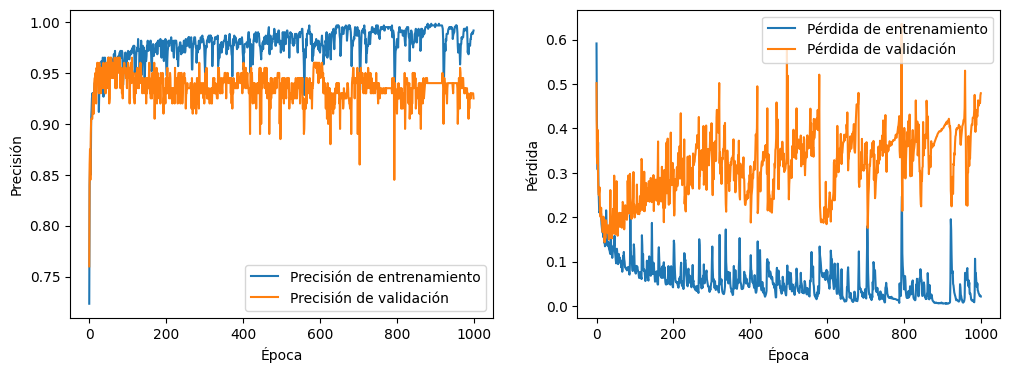

In [12]:
# Graficar la precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


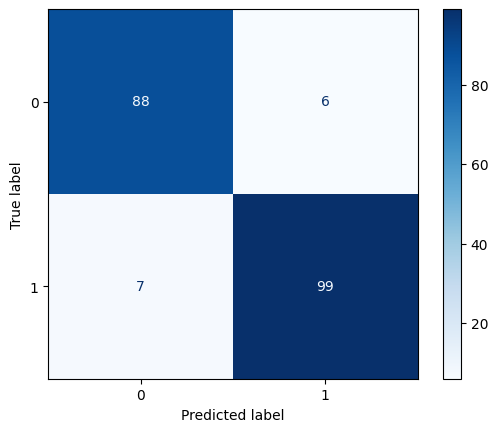

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        94
           1       0.94      0.93      0.94       106

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [13]:
# Predecir los valores del conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Mostrar reporte de clasificación
print(classification_report(y_test, y_pred))
